#### 引入库，设置绘制参数

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams  ## run command settings for plotting

config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)  ## 设置画图的一些参数

#### 读取数据

In [4]:
## 读取数据
path = '/Users/显/Desktop/作业/机器学习/regress_data1.csv'
import pandas as pd
data = pd.read_csv(path) ## data 是dataframe 的数据类型。pd.read.csv()用于读取CSV(逗号分隔)格式的数据文件并转换为DataFrame(表格类)对象

cols = data.shape[1]
## iloc()函数用于对数据进行索引和切片，参数以逗号分隔
X_data = data.iloc[:,:cols-1]#X是所有行，去掉最后一列， 未标准化
y_data = data.iloc[:,cols-1:]#Y是所有行，最后一列

data.describe() ## 查看数据的统计信息

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


#### 分训练集与测试集

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.2)

#### 计算最大值，最小值，均值，方差

#### 进行标准化（此时在加一列之前）
##### 归一化后特征值集中在0-1

In [6]:
data_min=np.min(X_train)# 计算每个特征的最小值
data_max=np.max(X_train)

data_mean=np.mean(X_train)
data_variance=np.var(X_train,axis=0)

X_train=(X_train-data_min)/(data_max-data_min)
X_test=(X_test-data_min)/(data_max-data_min)

#### 散点图可视化原始数据与归一化数据

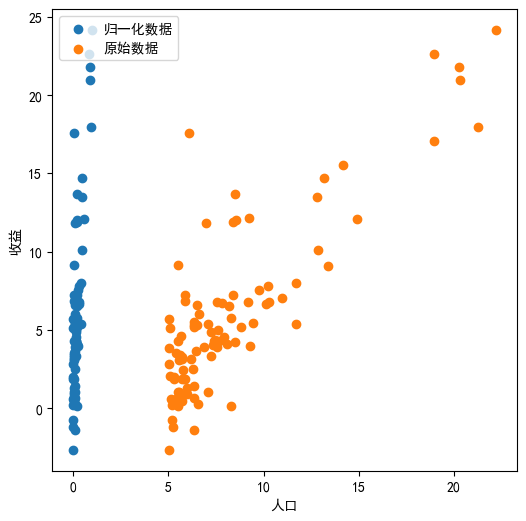

In [7]:
import matplotlib

plt.figure(figsize=(6,6))
plt.scatter(X_train,y_train,label='归一化数据')
plt.scatter(data['人口'],data['收益'],label='原始数据')
plt.legend(loc=2)
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.show()

#### X数组中加一列

In [8]:
X_train.insert(0, 'Ones', 1) # 是在X_data这个数据集第一列（即索引为零位置）插入一个全零的列，列名为‘Ones’，此列用作线性回归模型的截距项。表示当所有特征值为零是，模型预测值为多少。能确保模型能够学习到截距项，提高模型预测精度。
X_test.insert(0, 'Ones', 1)
X_train.head()#head()是观察前5行

X=X_train.values # 返回Narray类型对象（N维数组吧）
Y=y_train.values
W=np.array([[0.0],[0.0]]) ## 初始化W系数矩阵，w 是一个(2,1)矩阵

(X.shape,Y.shape, W.shape)

((77, 2), (77, 1), (2, 1))

#### 损失函数（未带范数）

In [9]:
def computeCost(X, Y, W):
    Y_hat = np.dot(X,W)
    loss =np.sum((Y_hat - Y)** 2)/(2*X.shape[0])# (m,n) @ (n, 1) -> (n, 1)
    return loss

def computeCost1(X, Y, W):
    Y_hat = X@W
    loss =np.sum((Y_hat - Y)** 2)/(2*X.shape[0])# (m,n) @ (n, 1) -> (n, 1)
    return loss

#### 带有l2范数的损失函数

In [10]:
lambda_l2=0.001# 为l2范数前系数

In [11]:
def l2_norm(vector, lambda_l2):
    return np.linalg.norm(vector,ord=2)*lambda_l2 #np.linalg.norm用于计算范数

# 带二范数的损失函数
def l2_computeCost(X, Y, W):
    Y_hat = X@W
    # loss =(np.sum((Y_hat - Y)** 2)/(2*X.shape[0]))+l2_norm(W, lambda_l2)# (m,n) @ (n, 1) -> (n, 1)
    loss =(np.sum((Y_hat - Y)** 2)/(2*X.shape[0]))+l2_norm(W, lambda_l2)# (m,n) @ (n, 1) -> (n, 1)
    return loss

#### 设置步长alpha，和迭代次数iters

In [12]:
alpha =0.1
iters = 10000

#### 梯度下降更新模型参数

In [13]:
def gradientDescent(X, Y, W, alpha):
    num_train = X.shape[0]     
    Y_hat = np.dot(X,W)        
    dW = X.T@(Y_hat-Y)/ X.shape[0] # 平均每个样本的损失，得到标准化的梯度，不受样本多少的影响，有助于保持梯度在不同大小数据集之间的一致性
#     dW = X.T@(Y_hat-Y)
    W += -alpha * dW# 更新模型参数
    return W

#### 使用梯度下降法学习线性回归模型参数

In [14]:
def linearRegression(X,Y, alpha, iters):
    loss_his = []
    loss_test=[]
    # step1: initialize the model parameters
    feature_dim = X.shape[1]
    W=np.zeros((feature_dim,1)) ## 初始化W系数矩阵，w 是一个(feature_dim,1)矩阵
    ## repeat step 2 and step 3 untill to the convergence or the end of iterations
    for i in range (iters):
        # step2 : using the initilized parameters to predict the output and calculate the loss   
        loss = computeCost(X,Y,W) # 用于计算给定权重W下模型预测值和真实值之间的损失
        loss_t=computeCost(X_test.values,y_test.values,W) 
        loss_his.append(loss) # 记录训练损失
        loss_test.append(loss_t)
        # step3: using the gradient decent method to update the parameters 循环2,3
        W=gradientDescent(X, Y, W, alpha)
    return loss_his,loss_test, W ## 返回损失和模型参数。

#### 用带有l2范数的损失函数更新模型参数，梯度下降求解线性回归模型

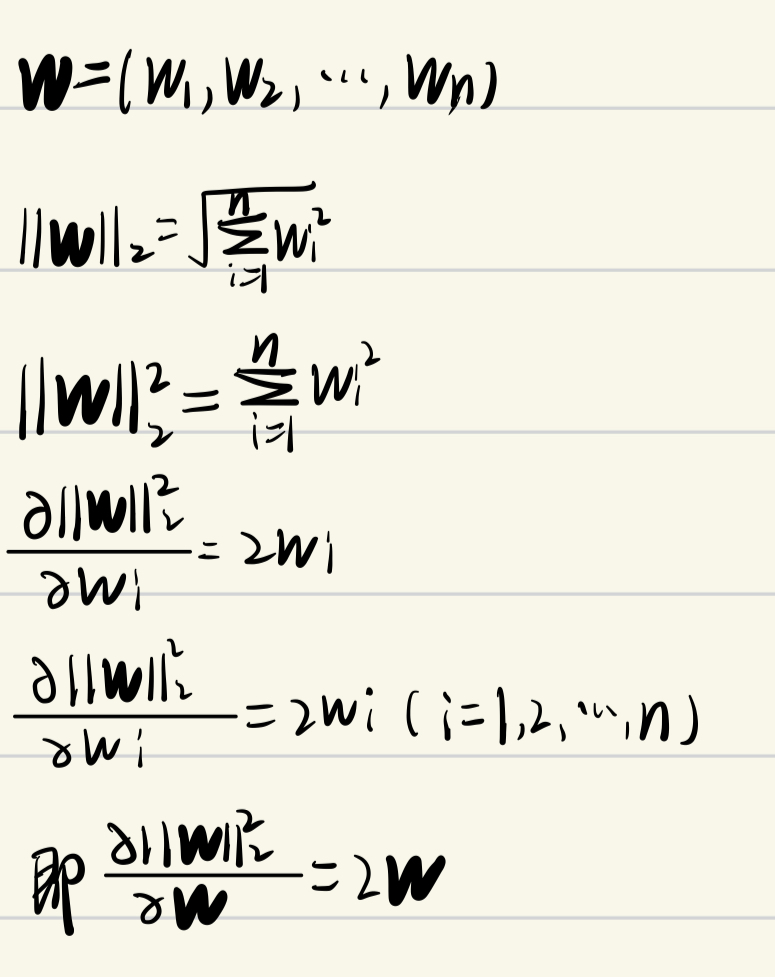

In [15]:
def l2_gradientDescent(X, Y, W, alpha):
    num_train = X.shape[0]     
    Y_hat = np.dot(X,W)        
    dW = (X.T@(Y_hat-Y)+2*W)/ X.shape[0]
    W += -alpha * dW
    return W

In [16]:
def l2_linearRegression(X,Y, alpha, iters):
    loss_his = []
    loss_test_l2=[]
    # step1: initialize the model parameters
    feature_dim = X.shape[1]
    W=np.zeros((feature_dim,1)) ## 初始化W系数矩阵，w 是一个(feature_dim,1)矩阵
    ## repeat step 2 and step 3 untill to the convergence or the end of iterations
    for i in range (iters):
        # step2 : using the initilized parameters to predict the output and calculate the loss   
        loss = computeCost(X,Y,W)
        loss_t_l2 = l2_computeCost(X_test.values,y_test.values,W)
        loss_his.append(loss)
        loss_test_l2.append(loss_t_l2)
        # step3: using the gradient decent method to update the parameters 
        W=l2_gradientDescent(X, Y, W, alpha)
    return loss_his,loss_test_l2, W ## 返回损失和模型参数。

#### 预测值y

In [17]:
def predict(X, W):
    '''
    输入：
        X：测试数据集
        W：模型训练好的参数
    输出：
        y_pre：预测值
    '''
    y_pre = np.dot(X,W)
    return y_pre

#### 训练、测试过程的损失记录，训练过程的模型参数记录

In [18]:
loss_his,loss_test, W = linearRegression(X,Y, alpha, iters) #训练过程的损失记录，以及训练好的模型参数

loss_his_l2, loss_test_l2,W_l2 = l2_linearRegression(X,Y, alpha, iters) #训练过程的损失记录，以及训练好的模型参数

#### 利用最终参数w求解模型曲线

In [19]:
x = np.linspace(X_train['人口'].min(), X_train['人口'].max(), 100) #生成100个点，间距为（max-min）/99

f = W[0, 0] + (W[1, 0] * x) #算出模型曲线

f_l2 = W_l2[0, 0] + (W_l2[1, 0] * x) #算出模型曲线

#### 绘制模型曲线和训练数据的散点图

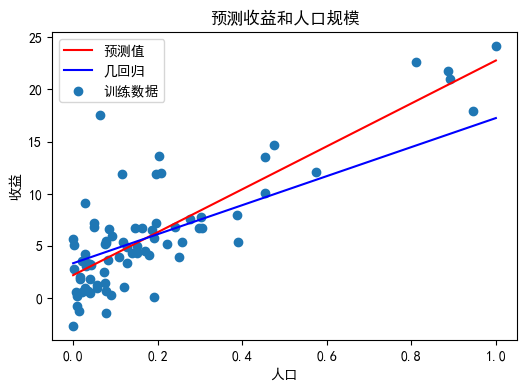

In [20]:
fig, ax = plt.subplots(figsize=(6, 4)) # figsize=(6, 4)规定尺寸，plt.subplots()用于创建一个新图形和一组子图，子图可看做是在图形中的绘图区域，函数返回两个对象：图形对象fig和子图对象ax。可使用这两个对象进一步配置和绘制图形
ax.plot(x, f, 'r', label='预测值')
ax.plot(x, f_l2, 'b', label='几回归')

ax.scatter(X_train['人口'], y_train['收益'], label='训练数据')
ax.legend(loc=2) #用于在子图上添加图例，loc用于指定图例在图形中的位置，loc=2将图例置于左上角
ax.set_xlabel('人口' )
ax.set_ylabel('收益', rotation=90) #rotation=90标签旋转90度，垂直显示
ax.set_title('预测收益和人口规模')
plt.show()


#### 同时画出训练损失和测试损失

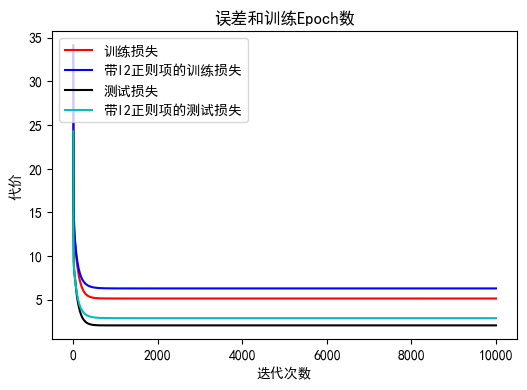

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(iters), loss_his, 'r',label='训练损失')# 绘制loss_his随着迭代次数变化的曲线，即绘制模型训练过程中每次迭代的损失值
ax.plot(np.arange(iters), loss_his_l2, 'b',label='带l2正则项的训练损失')

ax.plot(np.arange(iters), loss_test, 'k',label='测试损失')
ax.plot(np.arange(iters), loss_test_l2, 'c',label='带l2正则项的测试损失')

ax.legend(loc=2) #用于在子图上添加图例，loc用于指定图例在图形中的位置，loc=2将图例置于左上角
ax.set_xlabel('迭代次数')
ax.set_ylabel('代价', rotation=90)
ax.set_title('误差和训练Epoch数')
plt.show()

#### 使用LSQ最小二乘拟合求解线性回归模型

In [22]:
# X.T 是X的转置，np.linalg.inv计算逆矩阵，np.dot计算矩阵乘法
coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

slope = coefficients[1] # 斜率 (m)
intercept = coefficients[0]# 截距 (b)

x = np.linspace(X_train['人口'].min(), X_train['人口'].max(), 100) #生成100个点，间距为（max-min）/99
f_lsq = intercept + (slope * x) #算出模型曲线

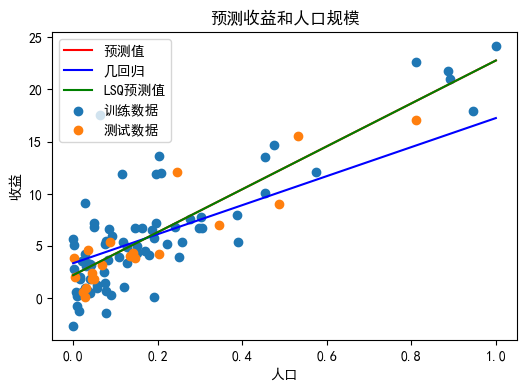

In [23]:
fig, ax = plt.subplots(figsize=(6, 4)) # figsize=(6, 4)规定尺寸，plt.subplots()用于创建一个新图形和一组子图，子图可看做是在图形中的绘图区域，函数返回两个对象：图形对象fig和子图对象ax。可使用这两个对象进一步配置和绘制图形
ax.plot(x, f, 'r', label='预测值')
ax.plot(x, f_l2, 'b', label='几回归')
ax.plot(x, f_lsq, 'g', label='LSQ预测值')
ax.scatter(X_train['人口'], y_train['收益'], label='训练数据')
ax.scatter(X_test['人口'], y_test['收益'], label='测试数据')
ax.legend(loc=2) #用于在子图上添加图例，loc用于指定图例在图形中的位置，loc=2将图例置于左上角
ax.set_xlabel('人口' )
ax.set_ylabel('收益', rotation=90) #rotation=90标签旋转90度，垂直显示
ax.set_title('预测收益和人口规模')
plt.show()

#### 注：此图中梯度下降习得的模型曲线与LSQ曲线几乎重合，但与几回归模型曲线有一定偏差